In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfClean = pd.read_csv('data/compiledData/dfCleanMortes.csv')

dfClean.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,...,DIA_FATO,DIA_SEMANA_FATO,LAT_LONG,RESPONSE_GEOLOCATOR,GEOLOCATOR_ADDRESS,GEOLOCATOR_NEIGHBORHOOD,GEOLOCATOR_POSTCODE,ZONE_FROM_POSTCODE,BO_ANO,NUM_VITIMAS_CRIME
0,DECAP,1ª SEC,São Paulo,001 DP - Sé,10108,2019-01-01 07:56:59,3,2019,S.PAULO,08º D.P. BRAS,...,1,1,"-23.5462154481364,-46.631733309032","Rua Vinte e Cinco de Março, Sé, São Paulo, Reg...","{'road': 'Rua Vinte e Cinco de Março', 'suburb...",SÉ,01015-020,Centro,3-2019,1
1,DECAP,1ª SEC,São Paulo,001 DP - Sé,10101,2019-01-18 16:32:41,372,2019,S.PAULO,01º D.P. SE,...,18,4,"-23.5546896292896,-46.6296510483604","Vila Suíça, Sé, São Paulo, Região Imediata de ...","{'road': 'Vila Suíça', 'suburb': 'Sé', 'city':...",SÉ,01514-020,Centro,372-2019,1
2,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-20 00:15:18,534,2019,S.PAULO,78º D.P. JARDINS,...,19,5,"-23.560415289045,-46.6337071030673","Rua São Joaquim, Liberdade, São Paulo, Região ...","{'road': 'Rua São Joaquim', 'suburb': 'Liberda...",LIBERDADE,01511-001,Centro,534-2019,2
3,DECAP,1ª SEC,São Paulo,005 DP - Aclimação,10342,2019-01-23 00:07:25,624,2019,S.PAULO,78º D.P. JARDINS,...,22,1,"-23.5629637062019,-46.6455014429631","1627, Avenida Brigadeiro Luís Antônio, Bela Vi...","{'house_number': '1627', 'road': 'Avenida Brig...",BELA VISTA,01318-002,Centro,624-2019,2
4,DECAP,2ª SEC,São Paulo,095 DP - Heliópolis,10358,2019-01-24 11:54:50,259,2019,S.PAULO,95º D.P. HELIÓPOLIS,...,24,3,"-23.6075347234928,-46.595687674394","Rua Cônego Xavier, Vila Heliópolis, Sacomã, Sã...","{'road': 'Rua Cônego Xavier', 'suburb': 'Vila ...",VILA HELIÓPOLIS,04232-000,Zona Sul,259-2019,1


In [43]:
dfClean.columns

Index(['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'ID_DELEGACIA',
       'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO',
       'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO',
       'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA',
       'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'NATUREZA_APURADA', 'CRIME',
       'HORA_FATO_DT', 'MES_BO', 'DIA_BO', 'HORA_BO', 'DIA_SEMANA_BO',
       'ANO_FATO', 'MES_FATO', 'DIA_FATO', 'DIA_SEMANA_FATO', 'LAT_LONG',
       'RESPONSE_GEOLOCATOR', 'GEOLOCATOR_ADDRESS', 'GEOLOCATOR_NEIGHBORHOOD',
       'GEOLOCATOR_POSTCODE', 'ZONE_FROM_POSTCODE', 'BO_ANO',
       'NUM_VITIMAS_CRIME', 'IDADE_PESSOA_R', 'SEXO_PESSOA_R'],
      dtype='object')

In [3]:
map_sec = {
    "1ª SEC" : "1º SEC - CENTRO",
    "DEL.SEC.1º CENTRO" : "1º SEC - CENTRO",
    "2ª SEC" : "2º SEC - SUL",
    "DEL.SEC.2º SUL" : "2º SEC - SUL",
    "3ª SEC" : "3º SEC - OESTE",
    "DEL.SEC.3º OESTE" : "3º SEC - OESTE",
    "4ª SEC" : "4º SEC - NORTE",
    "DEL.SEC.4º NORTE" : "4º SEC - NORTE",
    "5ª SEC" : "5ª SEC - LESTE",
    "DEL.SEC.5º LESTE " : "5º SEC - LESTE",
    "6ª SEC" : "6º SEC - SANTO AMARO",
    "DEL.SEC.6º SANTO AMARO" : "6º SEC - SANTO AMARO",
    "7ª SEC" : "7º SEC - ITAQUERA",
    "DEL.SEC.7º ITAQUERA" : "7º SEC - ITAQUERA",
    "8ª SEC" : "8º SEC - SAO MATEUS",
    "DEL.SEC.8º SAO MATEUS" : "8º SEC - SAO MATEUS"}

dfClean.SECCIONAL_CIRCUNSCRICAO = dfClean.SECCIONAL_CIRCUNSCRICAO.map(map_sec)

dfClean.SEXO_PESSOA = dfClean.SEXO_PESSOA.str.strip().str.lower()
dfClean.COR_PELE = dfClean.COR_PELE.str.strip().replace({'Ignorada':'Ignorada/Não Informada','Não informada':'Ignorada/Não Informada'})

In [4]:
def generateAbsoluteGroupBy(var1,var2):
    df1 = dfClean.groupby([var1,var2]).size().reset_index().rename(columns={0:'Count'})

    return df1

def generateFrequencyGroupBy(var1,var2):
    df1 = dfClean.groupby([var1,var2]).agg({var2: 'count'})
    df2 = df1.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).rename(columns={var2:'Frequency'}).reset_index()

    return df2

def generateSubplots(df,variable):

    crimes = list(df['CRIME'].unique())

    fig, axes = plt.subplots(len(crimes),1,figsize=(15, len(crimes)*4), sharey=True)

    for i,c in enumerate(crimes):
        sns.lineplot(data=df[df['CRIME']==c], x=variable, y="Frequency",ax=axes[i],color=sns.color_palette()[i])
        axes[i].set_xlabel("")
        axes[i].set_title(c)
        if i==len(crimes)-1:
            plt.xlabel(variable)

# Análise Bivariada

<AxesSubplot:xlabel='SECCIONAL_CIRCUNSCRICAO', ylabel='Frequency'>

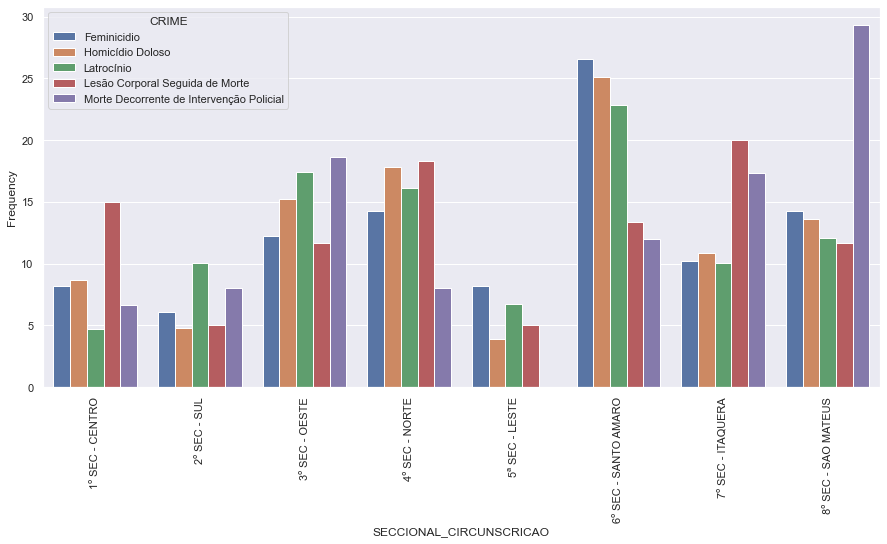

In [47]:
variable = 'SECCIONAL_CIRCUNSCRICAO'

df = generateFrequencyGroupBy('CRIME',variable)

fig, ax = plt.subplots(figsize=(15,7))

plt.xticks(rotation=90)
sns.barplot(data=df, x=variable, y="Frequency", hue="CRIME")


<AxesSubplot:xlabel='ZONE_FROM_POSTCODE', ylabel='Frequency'>

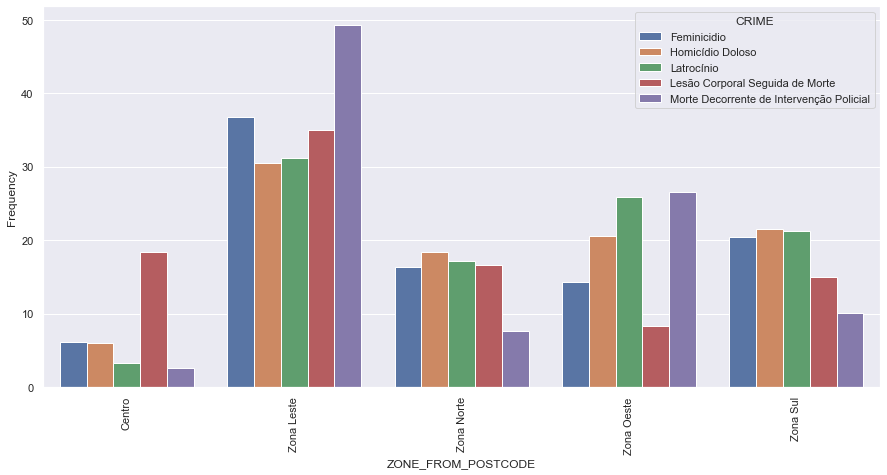

In [48]:
variable = 'ZONE_FROM_POSTCODE'


df = generateFrequencyGroupBy('CRIME',variable)
df = df[df[variable]!= '-']

fig, ax = plt.subplots(figsize=(15,7))

plt.xticks(rotation=90)
sns.barplot(data=df, x=variable, y="Frequency", hue="CRIME")

<AxesSubplot:xlabel='SEXO_PESSOA', ylabel='Frequency'>

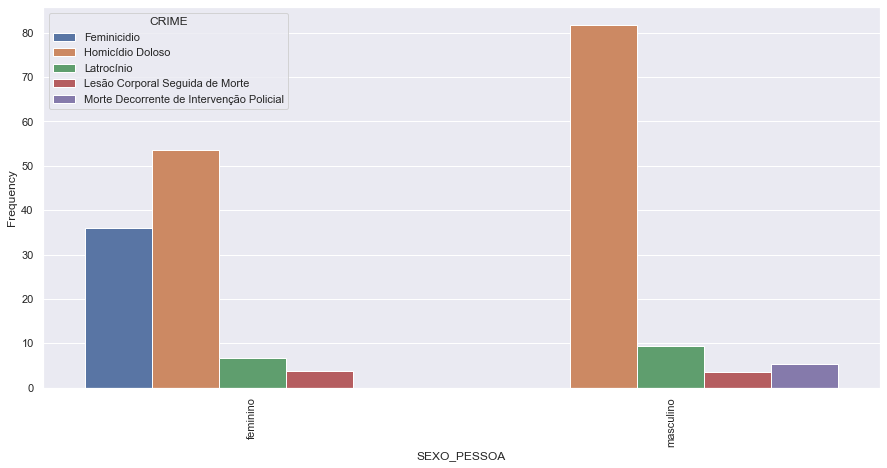

In [49]:
variable = 'SEXO_PESSOA'

df = generateFrequencyGroupBy(variable,'CRIME')
df2 = df[df[variable].isin(['feminino','masculino'])]

fig, ax = plt.subplots(figsize=(15,7))

plt.xticks(rotation=90)
sns.barplot(data=df2, x=variable, y="Frequency", hue="CRIME")


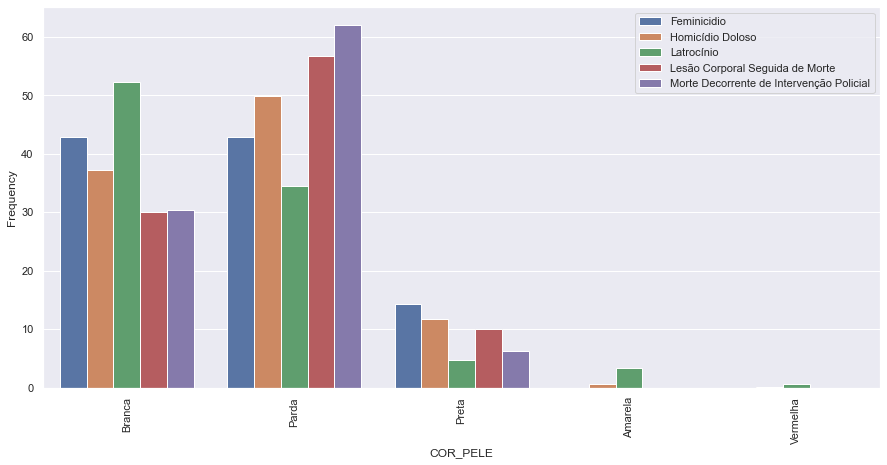

In [50]:
variable = 'COR_PELE'

df = generateFrequencyGroupBy('CRIME',variable)
df2 = df[df[variable]!='Ignorada/Não Informada']

fig, ax = plt.subplots(figsize=(15,7))

plt.xticks(rotation=90)

sns.barplot(data=df2, x=variable, y="Frequency", hue="CRIME")
plt.legend(loc='upper right')

<AxesSubplot:xlabel='CRIME', ylabel='Frequency'>

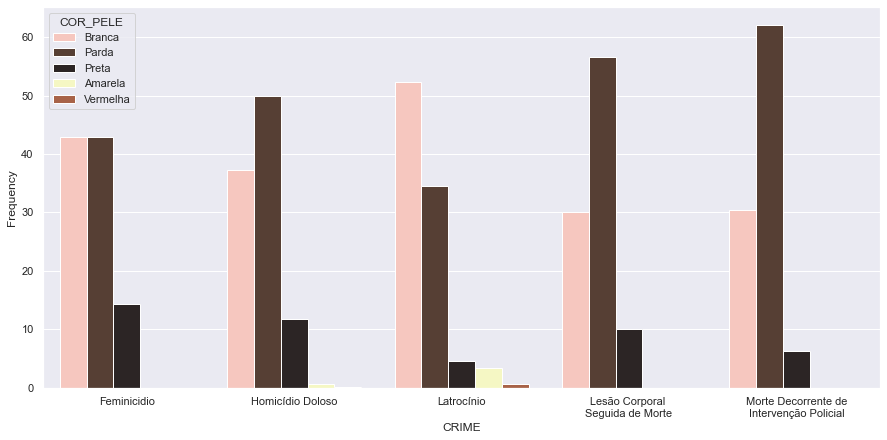

In [81]:
variable = 'COR_PELE'

df = generateFrequencyGroupBy('CRIME',variable)
df2 = df[df[variable]!='Ignorada/Não Informada'].replace({'Lesão Corporal Seguida de Morte':'Lesão Corporal \nSeguida de Morte','Morte Decorrente de Intervenção Policial':'Morte Decorrente de\nIntervenção Policial'})

fig, ax = plt.subplots(figsize=(15,7))


sns.barplot(data=df2, x='CRIME', y="Frequency", hue=variable,palette= sns.color_palette(['#FFC1B6','#5C3D2E','#2D2424','#FDFFBC','#B85C38']))


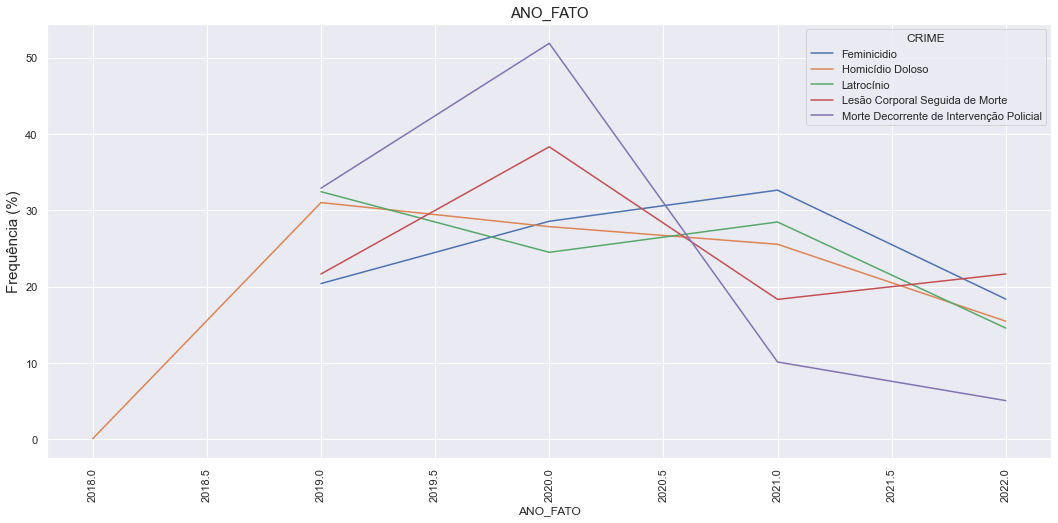

In [8]:
variable = 'ANO_FATO'

df1 = dfClean.groupby(['CRIME',variable]).agg({variable: 'count'})
df2 = df1.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).rename(columns={variable:'Frequency'}).reset_index()


sns.set(rc={'figure.figsize':(18,8)})
g = sns.lineplot(data=df2, x=variable, y="Frequency", hue="CRIME")


plt.xticks(rotation=90)
plt.title(variable, fontdict = {'fontsize': 15})
plt.ylabel("Frequência (%)", fontdict={'fontsize': 15})

plt.show()

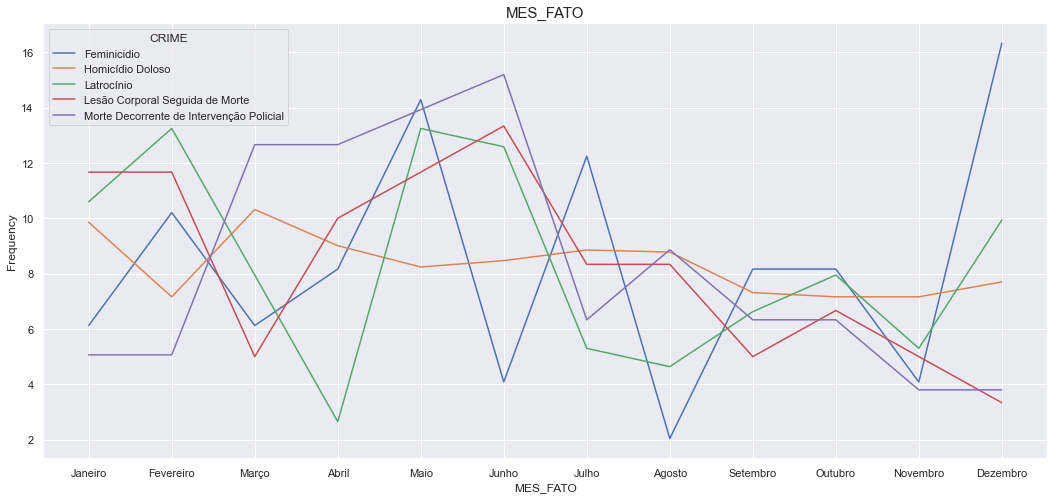

In [9]:
dictMonthsOfYear = {'1': 'Janeiro',
                    '2': 'Fevereiro',
                    '3': 'Março',
                    '4': 'Abril',
                    '5': 'Maio',
                    '6': 'Junho',
                    '7': 'Julho',
                    '8': 'Agosto',
                    '9': 'Setembro',
                    '10': 'Outubro',
                    '11': 'Novembro',
                    '12': 'Dezembro'}


variable = 'MES_FATO'
df = generateFrequencyGroupBy('CRIME',variable)
df[variable] = df[variable].astype(str).map(dictMonthsOfYear)


sns.set(rc={'figure.figsize':(18,8)})
sns.lineplot(data=df, x=variable, y="Frequency", hue="CRIME")


plt.title(variable, fontdict = {'fontsize': 15})

plt.show()

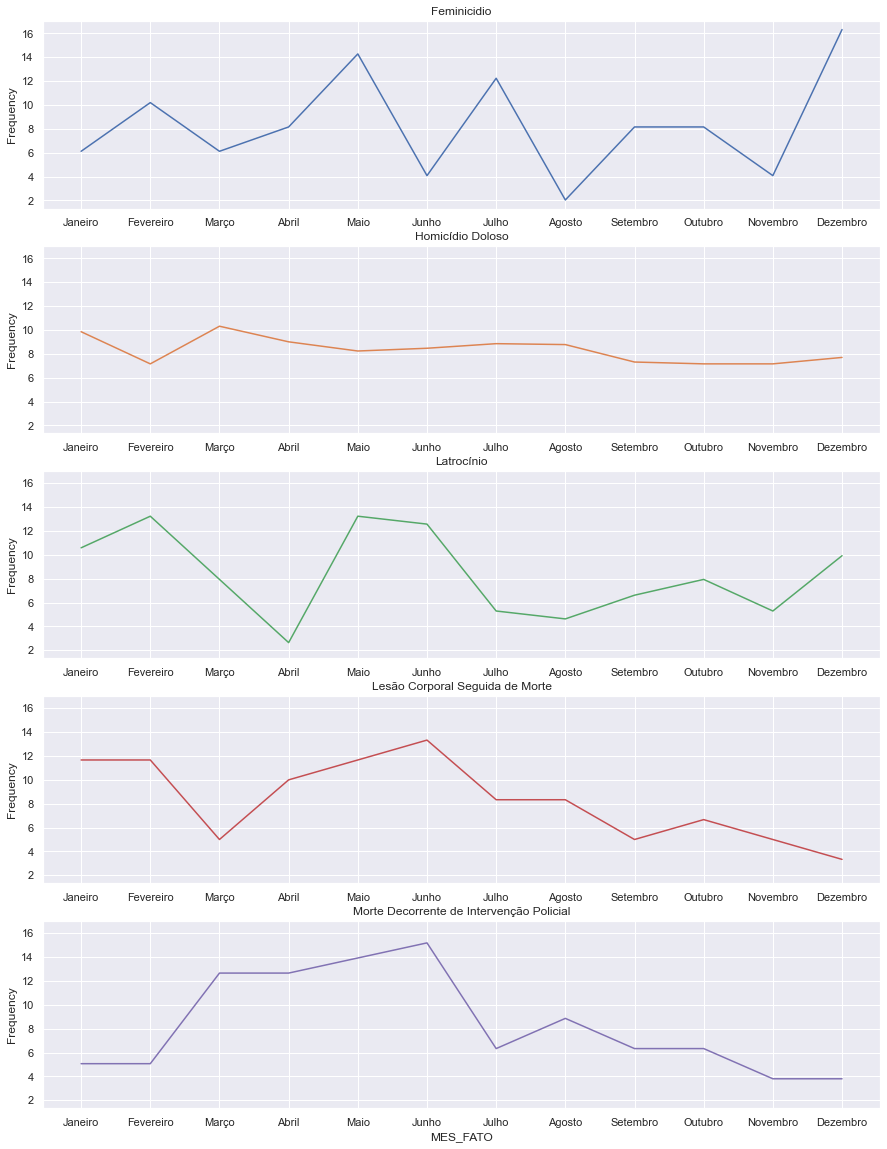

In [10]:
variable = 'MES_FATO'
df = generateFrequencyGroupBy('CRIME',variable)
df[variable] = df[variable].astype(str).map(dictMonthsOfYear)
generateSubplots(df,variable)

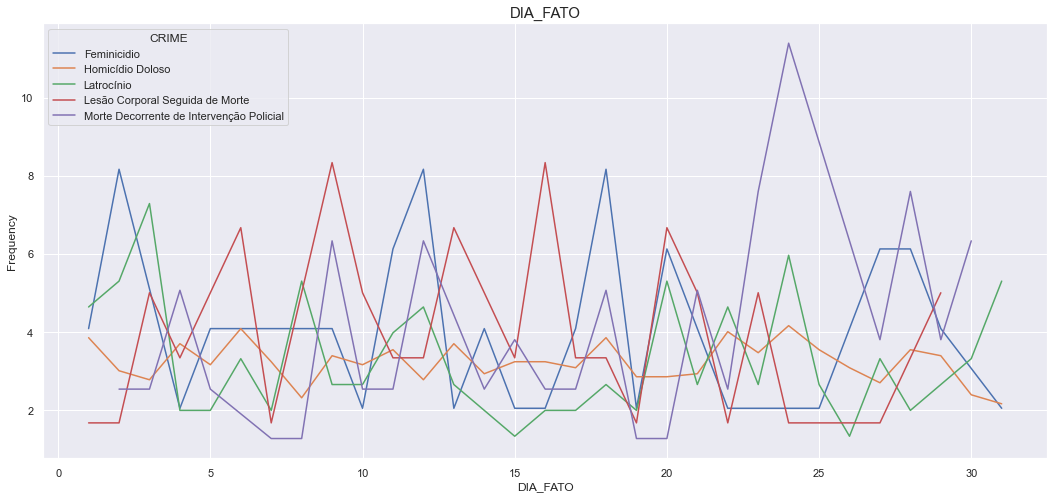

In [11]:
variable = 'DIA_FATO'
df = generateFrequencyGroupBy('CRIME',variable)

sns.set(rc={'figure.figsize':(18,8)})
sns.lineplot(data=df, x=variable, y="Frequency", hue="CRIME")
plt.title(variable, fontdict = {'fontsize': 15})
plt.show()

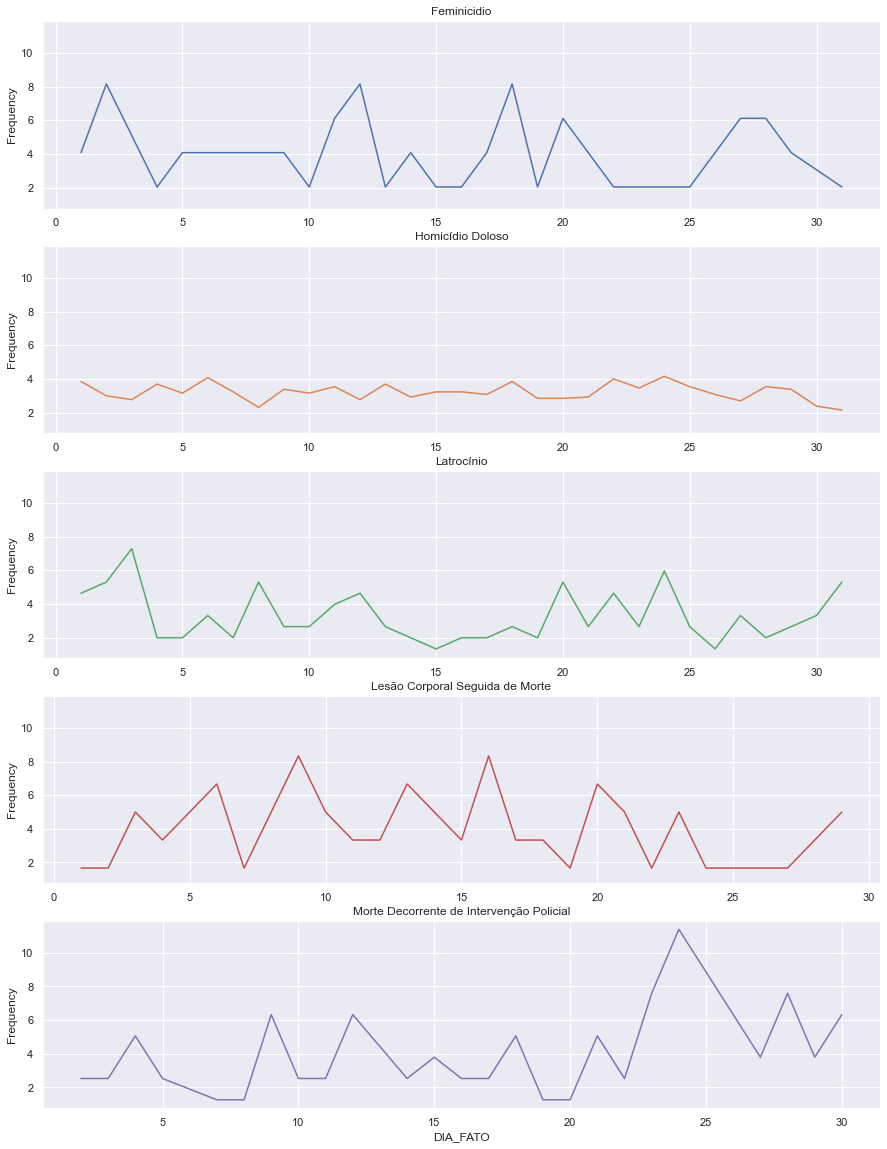

In [12]:
variable = 'DIA_FATO'
df = generateFrequencyGroupBy('CRIME',variable)

generateSubplots(df,variable)

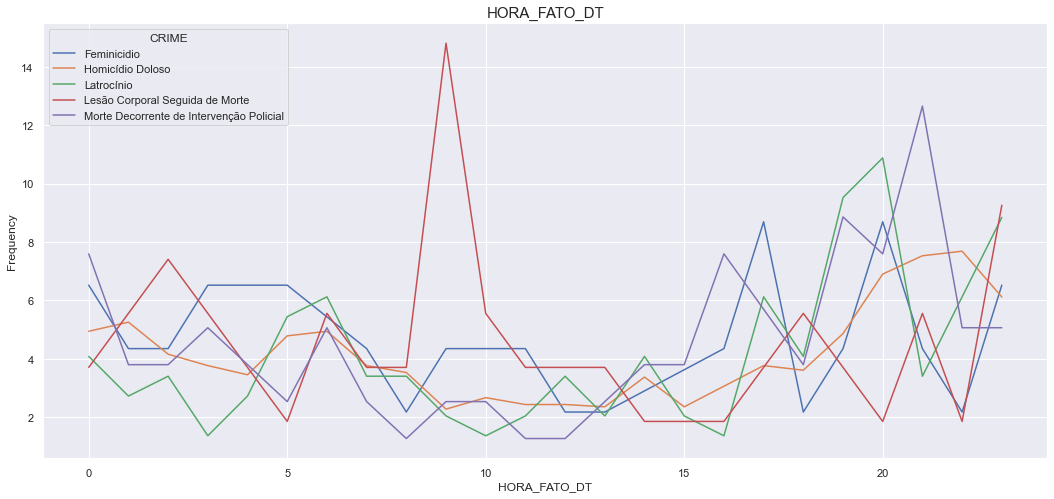

In [13]:
variable = 'HORA_FATO_DT'
df = generateFrequencyGroupBy('CRIME',variable)



sns.set(rc={'figure.figsize':(18,8)})
sns.lineplot(data=df, x=variable, y="Frequency", hue="CRIME")
plt.title(variable, fontdict = {'fontsize': 15})
plt.show()

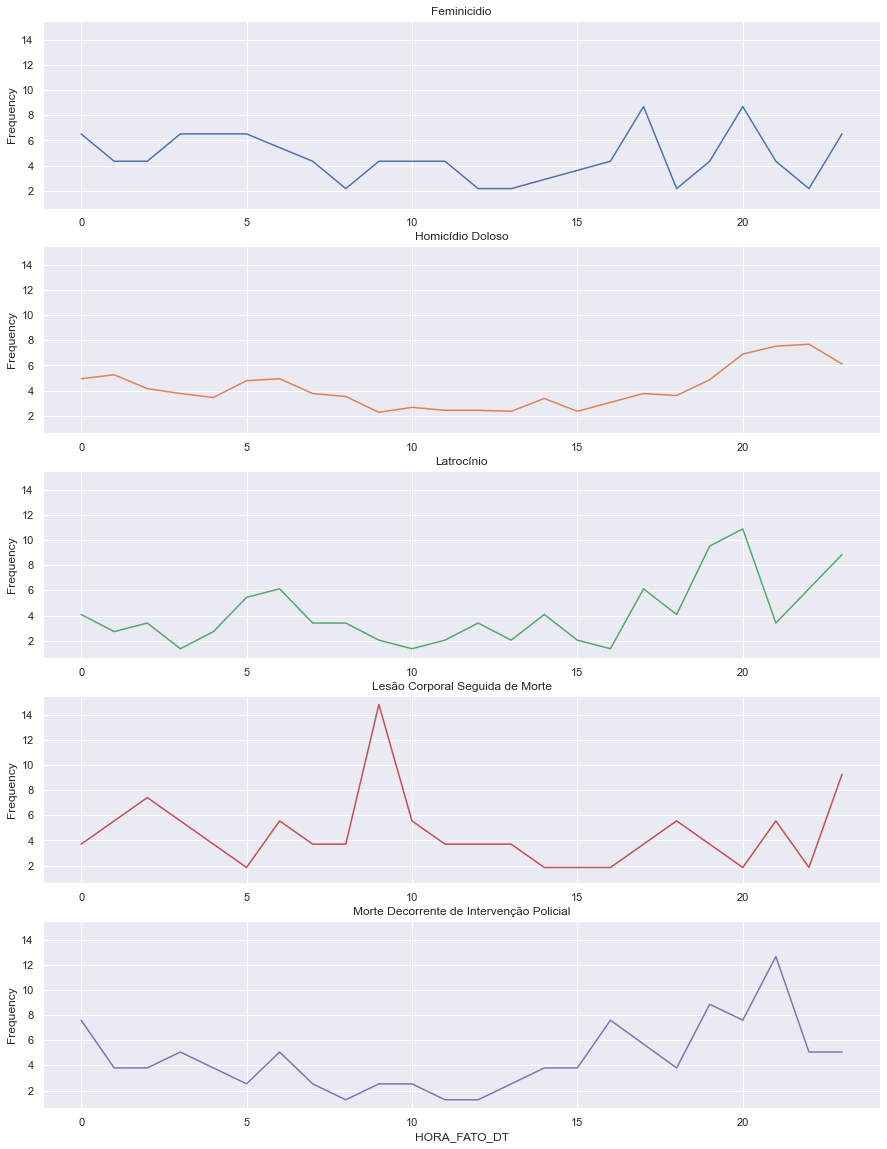

In [14]:
variable = 'HORA_FATO_DT'

df = generateFrequencyGroupBy('CRIME',variable)

generateSubplots(df,variable)

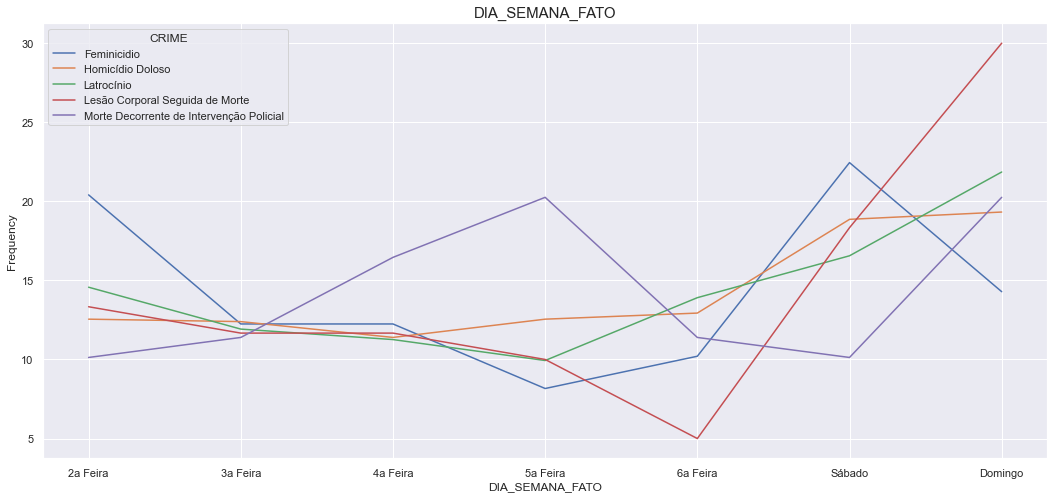

In [54]:
dictWeekdays = {'0':'2a Feira',
                '1':'3a Feira',
                '2':'4a Feira',
                '3':'5a Feira',
                '4':'6a Feira',
                '5':'Sábado',
                '6':'Domingo'}

variable = 'DIA_SEMANA_FATO'
df = generateFrequencyGroupBy('CRIME',variable)

df[variable] = df[variable].astype(str).map(dictWeekdays)

sns.set(rc={'figure.figsize':(18,8)})
sns.lineplot(data=df, x=variable, y="Frequency", hue="CRIME")
plt.title(variable, fontdict = {'fontsize': 15})
plt.show()

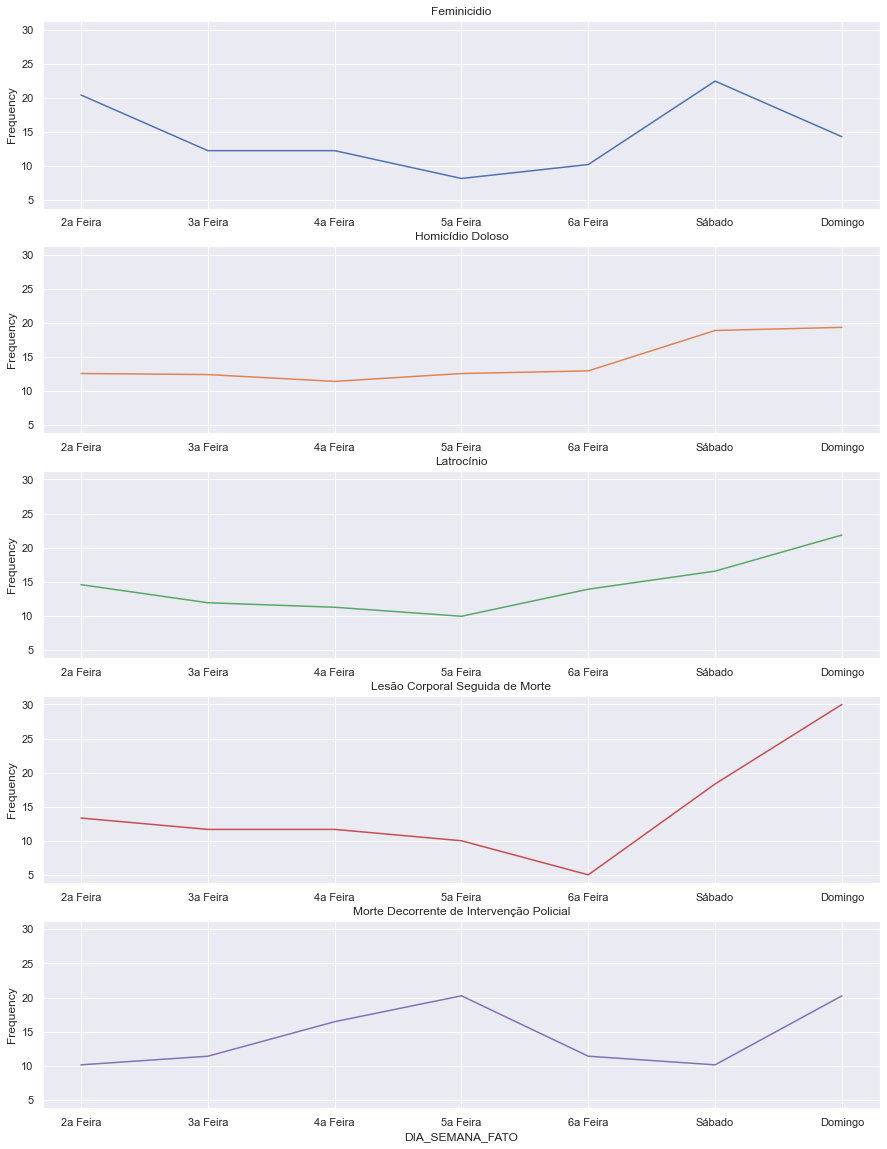

In [55]:
variable = 'DIA_SEMANA_FATO'

df = generateFrequencyGroupBy('CRIME',variable)
df[variable] = df[variable].astype(str).map(dictWeekdays)

generateSubplots(df,variable)

<AxesSubplot:xlabel='CRIME', ylabel='IDADE_PESSOA_R'>

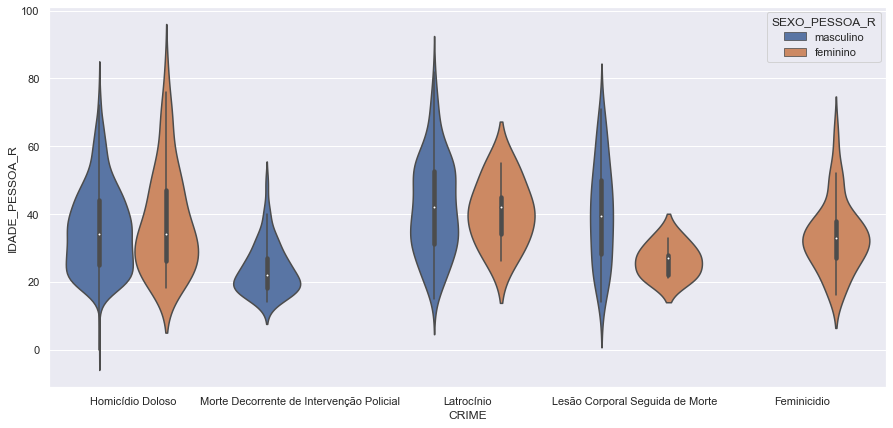

In [82]:
import numpy as np

dfClean['IDADE_PESSOA_R'] = dfClean['IDADE_PESSOA'].replace('NÃO INFORMADO',np.nan).astype(float)
dfClean['SEXO_PESSOA_R'] = dfClean['SEXO_PESSOA'].replace('indefinido',np.nan)

fig, ax = plt.subplots(figsize=(15,7))

sns.violinplot(data=dfClean, x="CRIME", y="IDADE_PESSOA_R", hue="SEXO_PESSOA_R")


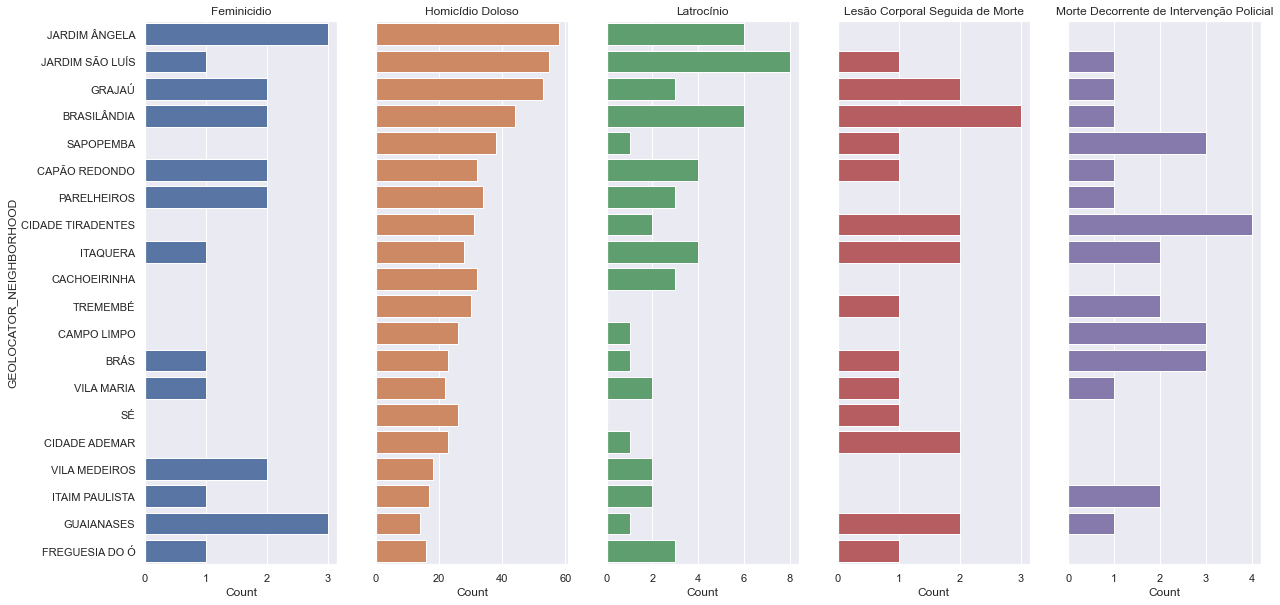

In [71]:
variable='GEOLOCATOR_NEIGHBORHOOD'

dfClean2 = dfClean[dfClean[variable]!='-']
top20 = list(dfClean2[variable].value_counts().head(20).keys())


dfClean2 = dfClean2[dfClean2['GEOLOCATOR_NEIGHBORHOOD'].isin(top20)]
crimes = ['Feminicidio','Homicídio Doloso','Latrocínio','Lesão Corporal Seguida de Morte','Morte Decorrente de Intervenção Policial']

df1 = dfClean2.groupby(['CRIME','GEOLOCATOR_NEIGHBORHOOD']).size().reset_index().rename(columns={0:'Count'})
df1.GEOLOCATOR_NEIGHBORHOOD = df1.GEOLOCATOR_NEIGHBORHOOD.astype("category")
df1.GEOLOCATOR_NEIGHBORHOOD = df1.GEOLOCATOR_NEIGHBORHOOD.cat.set_categories(top20)

fig, axes = plt.subplots(1,len(crimes),figsize=(len(crimes)*4,10), sharey=True)

for i,c in enumerate(crimes):
    sns.barplot(data=df1[df1['CRIME']==c], x="Count", y=variable,ax=axes[i],color=sns.color_palette()[i])
    axes[i].set_title(c)
    if i!=0:
        axes[i].set_ylabel("")

In [65]:
top20

['JARDIM ÂNGELA',
 'JARDIM SÃO LUÍS',
 'GRAJAÚ',
 'BRASILÂNDIA',
 'SAPOPEMBA',
 'CAPÃO REDONDO',
 'PARELHEIROS',
 'CIDADE TIRADENTES',
 'ITAQUERA',
 'CACHOEIRINHA',
 'TREMEMBÉ',
 'CAMPO LIMPO',
 'BRÁS',
 'VILA MARIA',
 'SÉ',
 'CIDADE ADEMAR',
 'VILA MEDEIROS',
 'ITAIM PAULISTA',
 'GUAIANASES',
 'FREGUESIA DO Ó']